In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1aa3ac7134303a6411e4148a252e82ff


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Import citipy
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nachingwea
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | lososina
Processing Record 12 of Set 1 | bend
Processing Record 13 of Set 1 | makakilo city
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | sao gabriel da cachoeira
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | torba

Processing Record 37 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 38 of Set 4 | aklavik
Processing Record 39 of Set 4 | port elizabeth
Processing Record 40 of Set 4 | larap
Processing Record 41 of Set 4 | ranau
Processing Record 42 of Set 4 | sept-iles
Processing Record 43 of Set 4 | sinop
Processing Record 44 of Set 4 | aykhal
Processing Record 45 of Set 4 | huainan
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | les cayes
Processing Record 48 of Set 4 | austin
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | kahului
Processing Record 1 of Set 5 | kailua
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | mimongo
Processing Record 4 of Set 5 | sault sainte marie
Processing Record 5 of Set 5 | corralillo
Processing Record 6 of Set 5 | faanui
Processing Record 7 of Set 5 | kabale
Processing Record 8 of Set 5 | hargeysa
Processing Record 9 of Set 5 | morondava
Processing Record 10 of Se

Processing Record 26 of Set 8 | srednekolymsk
Processing Record 27 of Set 8 | buala
Processing Record 28 of Set 8 | shinpokh
Processing Record 29 of Set 8 | half moon bay
Processing Record 30 of Set 8 | hadishahr
Processing Record 31 of Set 8 | milingimbi
City not found. Skipping...
Processing Record 32 of Set 8 | gimli
Processing Record 33 of Set 8 | ust-maya
Processing Record 34 of Set 8 | tuatapere
Processing Record 35 of Set 8 | carnarvon
Processing Record 36 of Set 8 | san juan
Processing Record 37 of Set 8 | tautira
Processing Record 38 of Set 8 | atasu
Processing Record 39 of Set 8 | nishihara
Processing Record 40 of Set 8 | maues
Processing Record 41 of Set 8 | aksarka
Processing Record 42 of Set 8 | babushkin
Processing Record 43 of Set 8 | makarska
Processing Record 44 of Set 8 | skjeberg
Processing Record 45 of Set 8 | ixtapa
Processing Record 46 of Set 8 | comodoro rivadavia
Processing Record 47 of Set 8 | rylsk
Processing Record 48 of Set 8 | pitimbu
Processing Record 49 o

Processing Record 19 of Set 12 | kibre mengist
Processing Record 20 of Set 12 | mayo
Processing Record 21 of Set 12 | yaya
Processing Record 22 of Set 12 | gurupa
Processing Record 23 of Set 12 | baoqing
Processing Record 24 of Set 12 | gainesville
Processing Record 25 of Set 12 | lidkoping
Processing Record 26 of Set 12 | penzance
Processing Record 27 of Set 12 | pringsewu
Processing Record 28 of Set 12 | andrelandia
Processing Record 29 of Set 12 | lanigan
Processing Record 30 of Set 12 | talcahuano
Processing Record 31 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 32 of Set 12 | tamale
Processing Record 33 of Set 12 | nybro
Processing Record 34 of Set 12 | sobolevo
Processing Record 35 of Set 12 | craig
Processing Record 36 of Set 12 | waipawa
Processing Record 37 of Set 12 | lagos
Processing Record 38 of Set 12 | trinidad
Processing Record 39 of Set 12 | kumluca
Processing Record 40 of Set 12 | tha chang
Processing Record 41 of Set 12 | aguie
Processing Re

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nachingwea,-10.3833,38.7667,80.17,77,64,7.07,TZ,2021-03-03 08:28:13
1,Bengkulu,-3.8004,102.2655,84.47,66,100,8.61,ID,2021-03-03 08:28:14
2,Punta Arenas,-53.1500,-70.9167,41.00,81,0,6.91,CL,2021-03-03 08:28:14
3,Kavieng,-2.5744,150.7967,81.91,79,100,13.13,PG,2021-03-03 08:28:14
4,College,64.8569,-147.8028,5.00,78,90,3.27,US,2021-03-03 08:28:14
5,Butaritari,3.0707,172.7902,81.63,83,5,14.18,KI,2021-03-03 08:28:15
6,Bredasdorp,-34.5322,20.0403,78.80,47,0,8.05,ZA,2021-03-03 08:28:15
7,Hobart,-42.8794,147.3294,59.00,51,90,13.80,AU,2021-03-03 08:27:30
8,Kapaa,22.0752,-159.3190,71.60,73,40,18.41,US,2021-03-03 08:28:15
9,Lososina,48.9975,140.3106,16.36,93,96,7.29,RU,2021-03-03 08:28:16


In [13]:
# Adjust column order in data frame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nachingwea,TZ,2021-03-03 08:28:13,-10.3833,38.7667,80.17,77,64,7.07
1,Bengkulu,ID,2021-03-03 08:28:14,-3.8004,102.2655,84.47,66,100,8.61
2,Punta Arenas,CL,2021-03-03 08:28:14,-53.1500,-70.9167,41.00,81,0,6.91
3,Kavieng,PG,2021-03-03 08:28:14,-2.5744,150.7967,81.91,79,100,13.13
4,College,US,2021-03-03 08:28:14,64.8569,-147.8028,5.00,78,90,3.27
5,Butaritari,KI,2021-03-03 08:28:15,3.0707,172.7902,81.63,83,5,14.18
6,Bredasdorp,ZA,2021-03-03 08:28:15,-34.5322,20.0403,78.80,47,0,8.05
7,Hobart,AU,2021-03-03 08:27:30,-42.8794,147.3294,59.00,51,90,13.80
8,Kapaa,US,2021-03-03 08:28:15,22.0752,-159.3190,71.60,73,40,18.41
9,Lososina,RU,2021-03-03 08:28:16,48.9975,140.3106,16.36,93,96,7.29


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

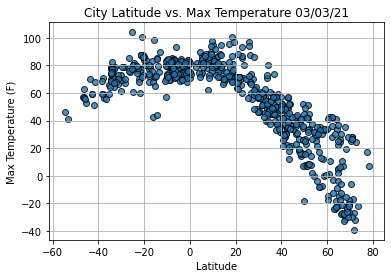

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

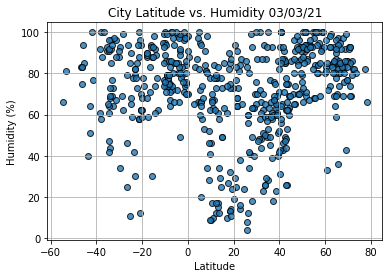

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

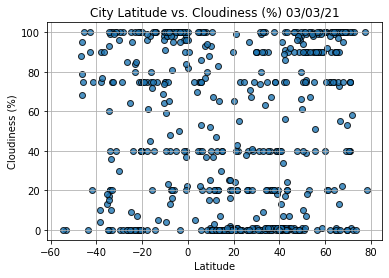

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

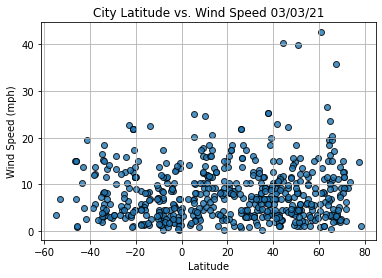

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()